In [1]:
#ali

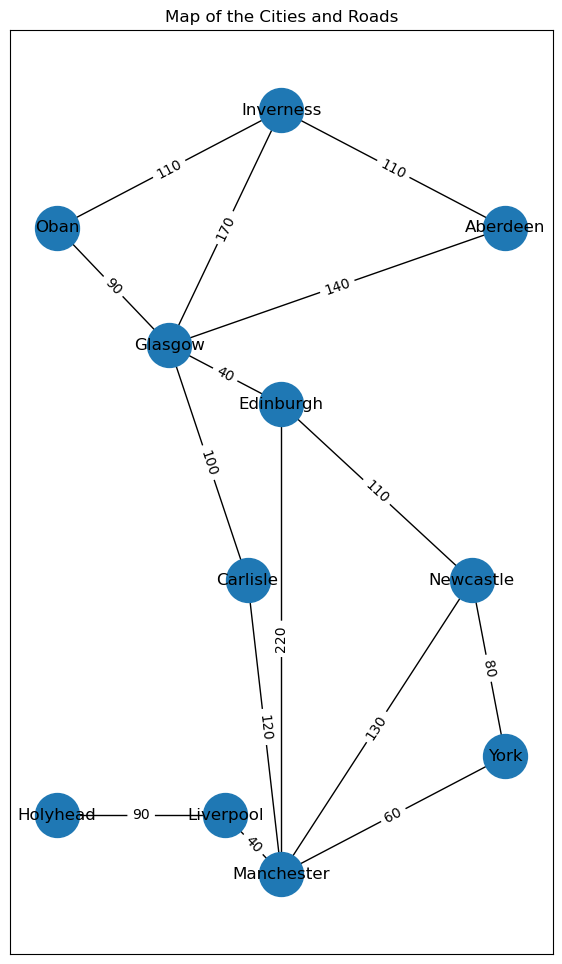

Enter the start point: Holyhead
Enter the end point: Glasgow


DFS Path: ['Holyhead', 'Liverpool', 'Manchester', 'Edinburgh', 'Glasgow']
Total distance for DFS is: 390


BFS Path: ['Holyhead', 'Liverpool', 'Manchester', 'Carlisle', 'Glasgow']
Total distance for BFS is: 350


A* Path: ['Holyhead', 'Liverpool', 'Manchester', 'Carlisle', 'Glasgow']
Total distance for A* is: 350


Dijkstra Path: ['Holyhead', 'Liverpool', 'Manchester', 'Carlisle', 'Glasgow']
Total distance for Dijkstra is: 350


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# Create a graph to represent the map
G = nx.Graph()

# Define cities and distances (unchanged)
cities = ["Manchester", "Holyhead", "Liverpool", "York", "Carlisle", "Newcastle", "Glasgow", "Edinburgh", "Oban", "Aberdeen", "Inverness"]

# Manually specify positions for the cities
city_positions = {
    "Manchester": (0, -2.5),
    "Holyhead": (-2, -2),
    "Liverpool": (-0.5, -2),
    "York": (2, -1.5),
    "Carlisle": (-0.3, 0),
    "Newcastle": (1.7, 0),
    "Glasgow": (-1, 2),
    "Edinburgh": (0, 1.5),
    "Oban": (-2, 3),
    "Aberdeen": (2, 3),
    "Inverness": (0, 4),
}

# Add edges with distances between cities
edges = [("Manchester", "Liverpool", 40),
         ("Manchester", "York", 60),
         ("Manchester", "Newcastle", 130),
         ("Manchester", "Carlisle", 120),
         ("Manchester", "Edinburgh", 220),
         ("Holyhead", "Liverpool", 90),
         ("York", "Newcastle", 80),
         ("Newcastle", "Edinburgh", 110),
         ("Carlisle", "Glasgow", 100),
         ("Edinburgh", "Glasgow", 40),
         ("Glasgow", "Oban", 90),
         ("Glasgow", "Inverness", 170),
         ("Glasgow", "Aberdeen", 140),
         ("Oban", "Inverness", 110),
         ("Inverness", "Aberdeen", 110)]

G.add_weighted_edges_from(edges)

# Set the size of the map
plt.figure(figsize=(7, 12))

# Visualize the graph with manually specified positions
nx.draw_networkx_nodes(G, city_positions, node_size=1000)
nx.draw_networkx_edges(G, city_positions)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, city_positions, edge_labels=edge_labels)
node_labels = {city: city for city in G.nodes}
nx.draw_networkx_labels(G, city_positions, labels=node_labels)

# Show the plot
plt.title("Map of the Cities and Roads")
plt.show()

# Ask user to write start and end point with error check
while True:
    try:
        start_point = str(input("Enter the start point: "))
        if start_point in cities:
            break
        else:
            print("Invalid input. Please enter a valid city name.")
    except ValueError:
        print("Invalid input. Please enter a valid city name.")
        
while True:
    try:
        end_point = str(input("Enter the end point: "))
        if end_point in cities:
            break
        else:
            print("Invalid input. Please enter a valid city name.")
    except ValueError:
        print("Invalid input. Please enter a valid city name.")
        
print("\n")
        
        
# Algorithims to find a best way

# Depth First Search (DFS)
def dfs(graph, start, goal):
    visited = set()
    stack = [(start, [start])]
    
    while stack:
        current_node, path = stack.pop()
        if current_node == goal:
            return path
        if current_node not in visited:
            visited.add(current_node)
            neighbors = graph.neighbors(current_node)
            for neighbor in neighbors:
                stack.append((neighbor, path + [neighbor]))
    return None

# Breadth First Search (BFS)
def bfs(graph, start, goal):
    visited = set()
    queue = [(start, [start])]
    
    while queue:
        current_node, path = queue.pop(0)
        if current_node == goal:
            return path
        if current_node not in visited:
            visited.add(current_node)
            neighbors = graph.neighbors(current_node)
            for neighbor in neighbors:
                queue.append((neighbor, path + [neighbor]))
    return None

# A* 

def astar(graph, start, goal):
    # Function to calculate heuristics 
    def heuristic(node):
        # Euclidean distance between nodes as a heuristic
        x1, y1 = city_positions[node]
        x2, y2 = city_positions[goal]
        return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    
    # Initialize priority queue with (priority, cost, current_node, path)
    priority_queue = [(0 + heuristic(start), 0, start, [start])]
    
    # Main A* search loop
    while priority_queue:
        _, cost, current_node, path = heapq.heappop(priority_queue)
        
        if current_node == goal:
            return path
        
        neighbors = graph.neighbors(current_node)
        
        for neighbor in neighbors:
            new_cost = cost + graph[current_node][neighbor]['weight']
            new_path = path + [neighbor]
            total_priority = new_cost + heuristic(neighbor)
            heapq.heappush(priority_queue, (total_priority, new_cost, neighbor, new_path))
    
    return None


#Why Choose Dijkstra's Algorithm:
#Dijkstra's algorithm is chosen because it is a widely used algorithm for finding the shortest paths in a graph. 
#It's a good choice when the goal is to find the optimal solution in terms of minimizing the total distance. 
#Additionally, in scenarios where negative edge weights are not present, Dijkstra's algorithm is a reliable option.

def dijkstra(graph, start, goal):
    # Initialize priority queue with (cost, current_node, path)
    priority_queue = [(0, start, [start])]
    
    # Set to keep track of visited nodes
    visited = set()
    
    # Main Dijkstra's algorithm loop
    while priority_queue:
        cost, current_node, path = heapq.heappop(priority_queue)
        
        if current_node == goal:
            return path
        
        if current_node not in visited:
            visited.add(current_node)
            neighbors = graph.neighbors(current_node)
            
            for neighbor in neighbors:
                new_cost = cost + graph[current_node][neighbor]['weight']
                new_path = path + [neighbor]
                heapq.heappush(priority_queue, (new_cost, neighbor, new_path))
    
    return None



dfs_path = dfs(G, start_point, end_point)
total_distanceDFS = sum(G[dfs_path[i]][dfs_path[i+1]]['weight'] for i in range(len(dfs_path)-1))
print("DFS Path:", dfs_path)
print("Total distance for DFS is:", total_distanceDFS)

print("\n")

bfs_path = bfs(G, start_point, end_point)
total_distanceBFS = sum(G[bfs_path[i]][bfs_path[i+1]]['weight'] for i in range(len(bfs_path)-1))
print("BFS Path:", bfs_path)
print("Total distance for BFS is:", total_distanceBFS)

print("\n")

astar_path = astar(G, start_point, end_point)
total_distanceAstar = sum(G[astar_path[i]][astar_path[i+1]]['weight'] for i in range(len(astar_path)-1))
print("A* Path:", astar_path)
print("Total distance for A* is:", total_distanceAstar)

print("\n")

dijk_path = dijkstra(G, start_point, end_point)
total_distanceDijk = sum(G[dijk_path[i]][dijk_path[i+1]]['weight'] for i in range(len(dijk_path)-1))
print("Dijkstra Path:", dijk_path)
print("Total distance for Dijkstra is:", total_distanceDijk)

